In [ ]:
#  1: KÜTÜPHANELERİN AKTARILMASI VE VERİ YÜKLEME

# 1.1. Çalışma için gerekli kütüphaneleri ekliyorum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from glob import glob
import warnings
warnings.filterwarnings('ignore')

# Veri setini indirmek için Kaggle bilgilerimi tanımlıyorum
os.environ['KAGGLE_USERNAME'] = "elifnurnver"
os.environ['KAGGLE_KEY'] = "7339096ddb7786f9e0b0c81792c3ad8d"

# Veri setini indiriyorum
if not os.path.exists("ISIC_Data"):
    print("Veri seti indirilecek")
    os.system("kaggle datasets download -d nodoubttome/skin-cancer9-classesisic")

    print("Zip dosyası çıkarılacak")
    os.system("unzip -q skin-cancer9-classesisic.zip -d ISIC_Data")
    print("Kurulum tamamlandı.")
else:
    print("Veri seti hazır.")


Veri seti hazır.


In [ ]:
# 1.2. Veri Setinin Yüklenmesi
# Klasördeki jpg uzantılı görüntüleri bir listeye atıyorum
resim_yollari = glob("ISIC_Data/**/*.jpg", recursive=True)

# Görüntü yollarını 'train_df' tablosuna aktarıyorum
train_df = pd.DataFrame({'path': resim_yollari})

print("\n--- 1.2 Veri Yükleme Sonuçlarım ---")
print("Oluşturduğum tablonun ilk 5 satırı: ")
print(train_df.head())
print(f"Toplam görüntü sayısı: {len(train_df)}")


--- 1.2 Veri Yükleme Sonuçlarım ---
Oluşturduğum tablonun ilk 5 satırı: 
                                                path
0  ISIC_Data/Skin cancer ISIC The International S...
1  ISIC_Data/Skin cancer ISIC The International S...
2  ISIC_Data/Skin cancer ISIC The International S...
3  ISIC_Data/Skin cancer ISIC The International S...
4  ISIC_Data/Skin cancer ISIC The International S...
Toplam görüntü sayısı: 2357


In [ ]:
# 1.3. Veri Özelliklerinin İncelenmesi ve Doğrulama
print("\n--- 1.3 Kanal Sayısı Doğrulaması ---")

# Örnek bir resim seçiyorum
ornek = cv2.imread(train_df['path'][0])

if ornek is not None:
    # A) RGB (RENKLİ) DOĞRULAMASI
    rgb_hali = cv2.cvtColor(ornek, cv2.COLOR_BGR2RGB)
    yukseklik, genislik, kanal_rgb = rgb_hali.shape

    print(f"1. Renkli Görüntü Analizi:")
    print(f"   - Boyut: {yukseklik}x{genislik}")
    print(f"   - Kanal Sayısı: {kanal_rgb}")

    if kanal_rgb == 3:
        print("   -> SONUÇ: Kanal sayısı 3 olduğu için bu görüntünün RGB (Renkli) olduğu DOĞRULANDI.")

    print("-" * 30)

    # B) GRAYSCALE (GRİ) DOĞRULAMASI
    gri_hali = cv2.cvtColor(ornek, cv2.COLOR_BGR2GRAY)
    # Grayscale resimlerde shape sadece (Yükseklik, Genişlik) döner, 3. boyut yoktur
    boyutlar = gri_hali.shape

    print(f"2. Gri Görüntü Analizi:")
    print(f"   - Boyut: {boyutlar[0]}x{boyutlar[1]}")

    # Gri resimde kanal boyutu olmaz veya 1 kabul edilir
    if len(boyutlar) == 2:
        print("   -> SONUÇ: 3. bir renk boyutu olmadığı için bu görüntünün Grayscale (Gri) olduğu DOĞRULANDI.")

else:
    print("Hata: Resim okunamadı.")


--- 1.3 Kanal Sayısı Doğrulaması ---
1. Renkli Görüntü Analizi:
   - Boyut: 450x600
   - Kanal Sayısı: 3
   -> SONUÇ: Kanal sayısı 3 olduğu için bu görüntünün RGB (Renkli) olduğu DOĞRULANDI.
------------------------------
2. Gri Görüntü Analizi:
   - Boyut: 450x600
   -> SONUÇ: 3. bir renk boyutu olmadığı için bu görüntünün Grayscale (Gri) olduğu DOĞRULANDI.


In [ ]:
# Dosya Boyutu Analizi

# Boyutları saklamak için liste yapıyorum
boyutlar = []

# Döngü ile tüm resimlere bakıyorum
for yol in train_df['path']:
    # os.path.getsize ile dosyanın boyutunu (byte) öğreniyorum.
    # 1024'e bölerek Kilobyte (KB) cinsine çeviriyorum.
    kb_cinsinden = os.path.getsize(yol) / 1024

    # Hesapladığım değeri listeye ekliyorum
    boyutlar.append(kb_cinsinden)

print(f"En Küçük Dosya: {np.min(boyutlar):.2f} KB")
print(f"En Büyük Dosya: {np.max(boyutlar):.2f} KB")
print(f"Ortalama Boyut: {np.mean(boyutlar):.2f} KB")

En Küçük Dosya: 24.15 KB
En Büyük Dosya: 20430.05 KB
Ortalama Boyut: 342.22 KB


In [ ]:
# 2: GÖRÜNTÜ YÜKLEME, GÖRSELLEŞTİRME VE İSTATİSTİK

# 2.1: Rastgele Görüntü Seçimi

# Veri setinden rastgele 9 tane görüntü seçiyorum.
# (random_state=42 yazdım ki her seferinde aynı resimler gelsin.)
secilen_resimler = train_df.sample(n=9, random_state=42)['path'].values

print("9 adet rastgele görüntü seçildi.")
print("Dosya yolları listesi hazır.")

9 adet rastgele görüntü seçildi.
Dosya yolları listesi hazır.


(Sol sütunda Renkli, Sağ sütunda Gri hallerini gösteriyorum)



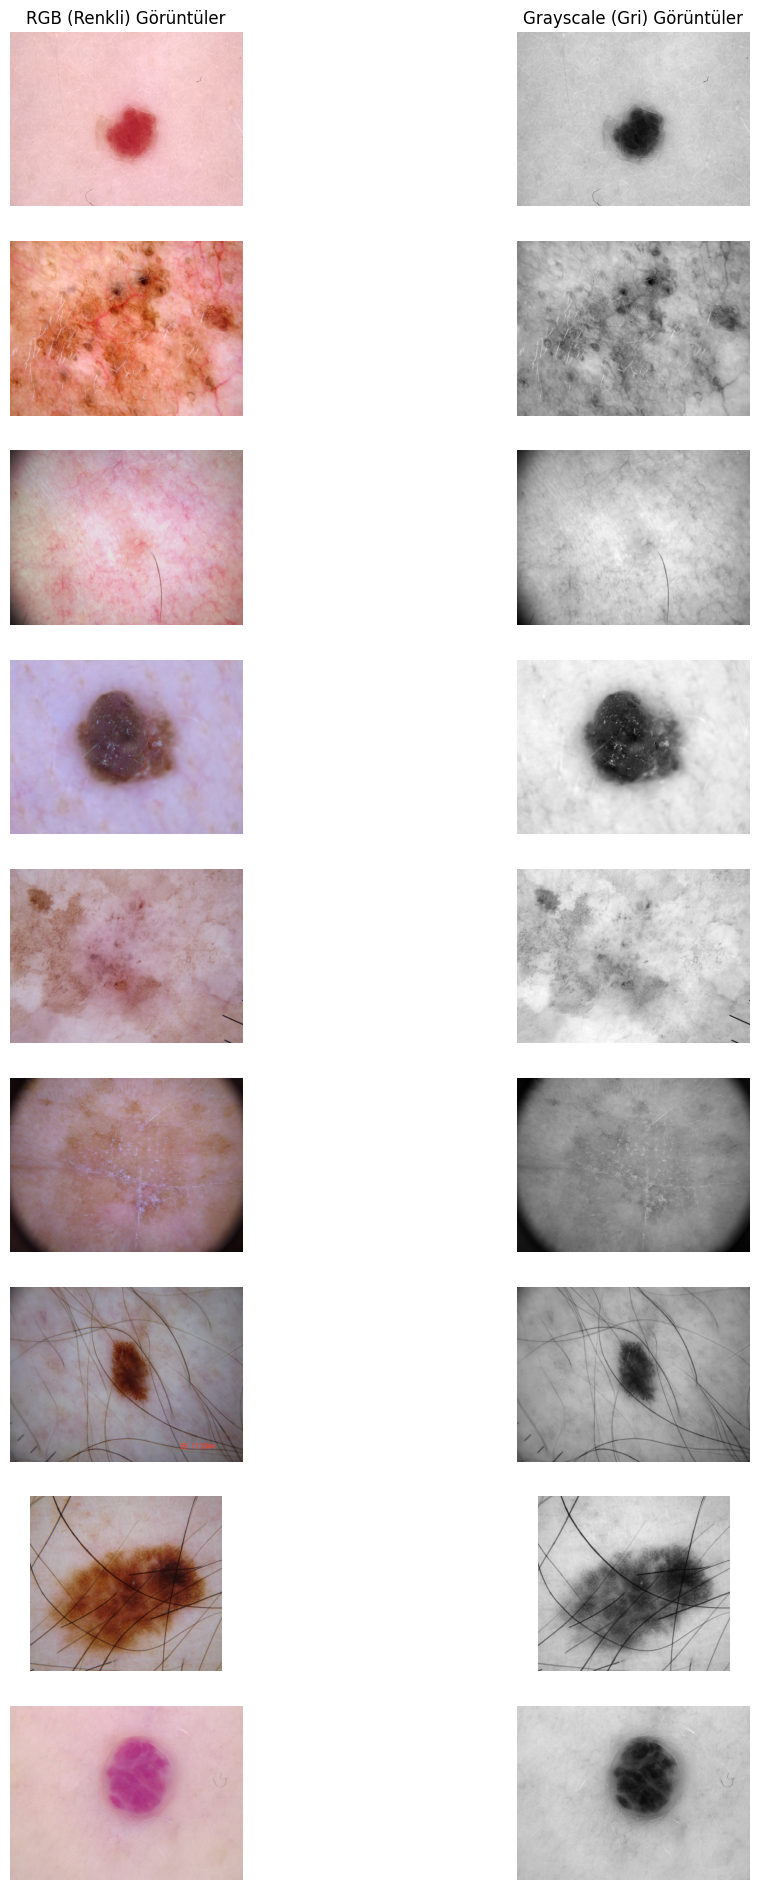

In [ ]:
print("(Sol sütunda Renkli, Sağ sütunda Gri hallerini gösteriyorum)\n")

# Çizim alanı açıyorum
plt.figure(figsize=(12, 24))

for i, yol in enumerate(secilen_resimler):
    # 1. Resmi Okuma
    img_bgr = cv2.imread(yol)

    # 2. Renkli ve Gri Tonlama
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)   # Renkli
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY) # Gri Tonlamalı

    # 2.1 Görselleştirme

    # Sol Sütun: RGB Hali
    plt.subplot(9, 2, i*2 + 1)
    plt.imshow(img_rgb)
    if i == 0: plt.title("RGB (Renkli) Görüntüler")
    plt.axis('off')

    # Sağ Sütun: Grayscale Hali
    plt.subplot(9, 2, i*2 + 2)
    plt.imshow(img_gray, cmap='gray')
    if i == 0: plt.title("Grayscale (Gri) Görüntüler")
    plt.axis('off')

In [ ]:
# 2.2: İstatiksel Özelliklerin Hesaplanması

print("--- 2.2 İstatistiksel Analiz Sonuçlarım ---")
print("(Her görüntü için RGB ve Grayscale değerlerini karşılaştırıyorum)\n")

# Seçilen 9 resim üzerinden döngüyle geçiyorum

for i, yol in enumerate(secilen_resimler):
    # 1. Resmi Okuma
    img_bgr = cv2.imread(yol)

    # 2. Renkli, Gri
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)   # Renkli
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY) # Gri

    print(f"Görüntü {i+1} İstatistikleri:")

    # RGB İstatistikleri (Renkli resimde 3 kanalın ortalamasını alarak genel bir fikir veriyorum)
    print(f"  [RGB]  Min: {img_rgb.min()},  Max: {img_rgb.max()},  "
          f"Ort: {img_rgb.mean():.2f},  Std Sapma: {img_rgb.std():.2f}")

    # Grayscale İstatistikleri
    print(f"  [GRAY] Min: {img_gray.min()},  Max: {img_gray.max()},  "
          f"Ort: {img_gray.mean():.2f},  Std Sapma: {img_gray.std():.2f}")

    # Karşılaştırma kolay olsun diye araya çizgi çekiyorum
    print("-" * 50)

--- 2.2 İstatistiksel Analiz Sonuçlarım ---
(Her görüntü için RGB ve Grayscale değerlerini karşılaştırıyorum)

Görüntü 1 İstatistikleri:
  [RGB]  Min: 25,  Max: 255,  Ort: 206.42,  Std Sapma: 32.81
  [GRAY] Min: 67,  Max: 249,  Ort: 204.42,  Std Sapma: 23.29
--------------------------------------------------
Görüntü 2 İstatistikleri:
  [RGB]  Min: 0,  Max: 255,  Ort: 159.79,  Std Sapma: 53.12
  [GRAY] Min: 9,  Max: 255,  Ort: 161.82,  Std Sapma: 26.07
--------------------------------------------------
Görüntü 3 İstatistikleri:
  [RGB]  Min: 21,  Max: 250,  Ort: 181.87,  Std Sapma: 31.77
  [GRAY] Min: 23,  Max: 235,  Ort: 179.01,  Std Sapma: 24.84
--------------------------------------------------
Görüntü 4 İstatistikleri:
  [RGB]  Min: 21,  Max: 243,  Ort: 171.28,  Std Sapma: 42.77
  [GRAY] Min: 38,  Max: 199,  Ort: 163.71,  Std Sapma: 37.50
--------------------------------------------------
Görüntü 5 İstatistikleri:
  [RGB]  Min: 0,  Max: 208,  Ort: 159.36,  Std Sapma: 24.36
  [GRAY] 

a) RGB Histogramı


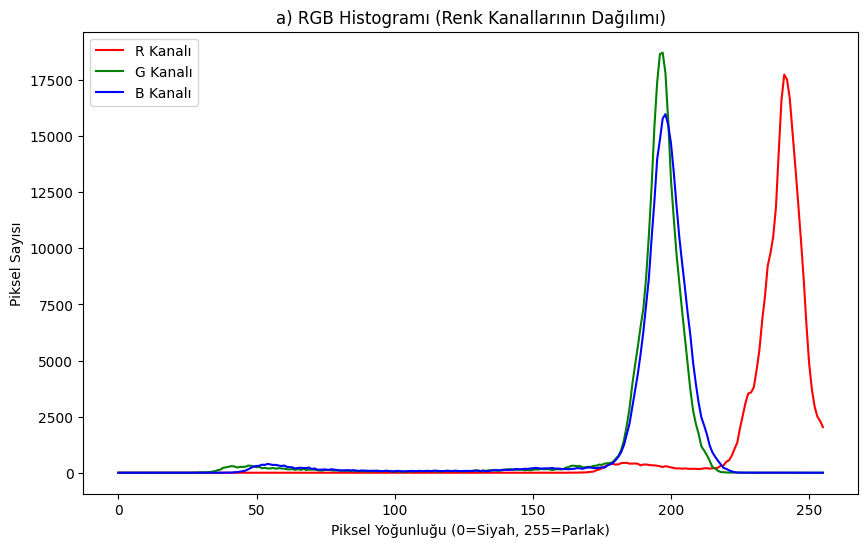

In [ ]:
# 2.3 (a): RGB HİSTOGRAMI ---

print("a) RGB Histogramı")

# Analiz için seçtiğim 9 resimden ilkini örnek alıyorum
ornek_resim_yolu = secilen_resimler[0]

# Resmi okuyup Renkli (RGB) hale getiriyorum
ornek_bgr = cv2.imread(ornek_resim_yolu)
ornek_rgb = cv2.cvtColor(ornek_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))

# R, G ve B kanalları için döngü kuruyorum
renkler = ('r', 'g', 'b') # Kırmızı, Yeşil, Mavi

for i, renk in enumerate(renkler):
    # calcHist fonksiyonu ile o kanalın piksel yoğunluğunu hesaplıyorum
    # [i] -> 0:Kırmızı, 1:Yeşil, 2:Mavi
    hist = cv2.calcHist([ornek_rgb], [i], None, [256], [0, 256])

    # Grafiğe çizdiriyorum
    plt.plot(hist, color=renk, label=f'{renk.upper()} Kanalı')

plt.title("a) RGB Histogramı (Renk Kanallarının Dağılımı)")
plt.xlabel("Piksel Yoğunluğu (0=Siyah, 255=Parlak)")
plt.ylabel("Piksel Sayısı")
plt.legend()
plt.show()

b) Grayscale Histogramı


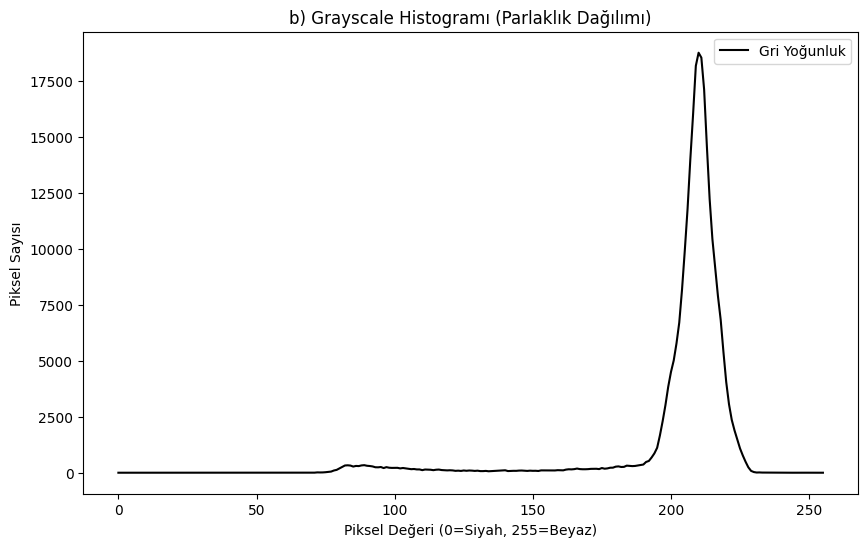

In [ ]:
# 2.3 (b): GRAYSCALE HİSTOGRAMI ---

print("b) Grayscale Histogramı")

# Aynı resmi bu sefer Gri (Grayscale) ye çeviriyorum
ornek_gray = cv2.cvtColor(ornek_bgr, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 6))

# Tek kanal olduğu için döngüye gerek yok, direkt [0] kanalını hesaplıyorum
hist_gray = cv2.calcHist([ornek_gray], [0], None, [256], [0, 256])

# Siyah renkle çizdiriyorum
plt.plot(hist_gray, color='black', label='Gri Yoğunluk')

plt.title("b) Grayscale Histogramı (Parlaklık Dağılımı)")
plt.xlabel("Piksel Değeri (0=Siyah, 255=Beyaz)")
plt.ylabel("Piksel Sayısı")
plt.legend()
plt.show()

In [ ]:
# 2.3 (c): ANALİZ VE YORUMLAR

print("c) Histogram Analiz Yorumlarım:\n")

print("* RGB Ayrımı:")
print("Grafikte Kırmızı (R) çizgisinin diğerlerine göre daha sağ tarafta (yani daha parlak değerlerde) olduğunu görüyorum.Bunun sebebi, incelediğimiz deri lezyonu görüntülerinde kırmızı tonun baskın olmasıdır.\n")

print("* Grayscale Yoğunlaşması:")
print("Gri histogramda renkler olmadığı için tek bir tepe noktası oluştu.Bu tepe noktası genelde grafiğin orta veya sağ tarafında toplanıyor, bu da resmin genel parlaklık seviyesini gösteriyor.\n")

print("* Dönüşümün Etkisi:")
print("RGB'den Grayscale'e geçerken 3 farklı renk kanalı birleşip tek bir kanala dönüştü.Bu yüzden renk ayrımını kaybettik ama resmin ışık/parlaklık dağılımını daha sade bir şekilde görmüş olduk.")

c) Histogram Analiz Yorumlarım:

* RGB Ayrımı:
Grafikte Kırmızı (R) çizgisinin diğerlerine göre daha sağ tarafta (yani daha parlak değerlerde) olduğunu görüyorum.Bunun sebebi, incelediğimiz deri lezyonu görüntülerinde kırmızı tonun baskın olmasıdır.

* Grayscale Yoğunlaşması:
Gri histogramda renkler olmadığı için tek bir tepe noktası oluştu.Bu tepe noktası genelde grafiğin orta veya sağ tarafında toplanıyor, bu da resmin genel parlaklık seviyesini gösteriyor.

* Dönüşümün Etkisi:
RGB'den Grayscale'e geçerken 3 farklı renk kanalı birleşip tek bir kanala dönüştü.Bu yüzden renk ayrımını kaybettik ama resmin ışık/parlaklık dağılımını daha sade bir şekilde görmüş olduk.


3.1 Kontrast Germe (Stretching)


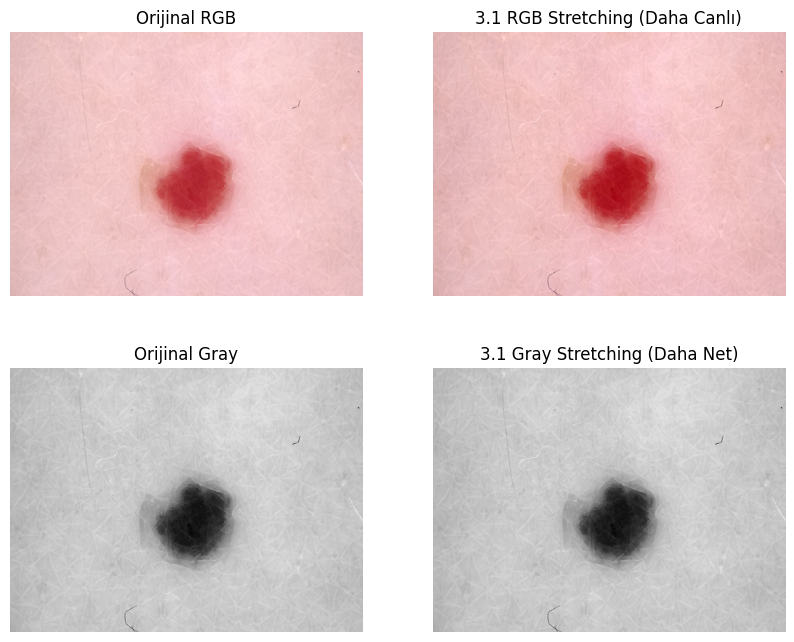

In [ ]:
# 3: GÖRÜNTÜ İŞLEME VE İYİLEŞTİRME
# 3.1: KONTRAST GERME (STRETCHING)

print("3.1 Kontrast Germe (Stretching)")

# İşlemleri göstermek için seçtiğimiz resimlerden ilkini kullanıyorum
resim_yolu = secilen_resimler[0]
img_bgr = cv2.imread(resim_yolu)

orijinal_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
orijinal_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Kontrast Germe Fonksiyonu
# Piksel değerlerini 0 (en siyah) ve 255 (en beyaz) arasına yayar
def kontrast_germe(img):
    return cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

stretch_rgb = kontrast_germe(orijinal_rgb)
stretch_gray = kontrast_germe(orijinal_gray)

# Görselleştirme
plt.figure(figsize=(10, 8))

# 1. Orijinal RGB
plt.subplot(2, 2, 1)
plt.imshow(orijinal_rgb)
plt.title("Orijinal RGB")
plt.axis('off')

# 2. Stretching Uygulanmış RGB
plt.subplot(2, 2, 2)
plt.imshow(stretch_rgb)
plt.title("3.1 RGB Stretching (Daha Canlı)")
plt.axis('off')

# 3. Orijinal Grayscale
plt.subplot(2, 2, 3)
plt.imshow(orijinal_gray, cmap='gray')
plt.title("Orijinal Gray")
plt.axis('off')

# 4. Stretching Uygulanmış Grayscale
plt.subplot(2, 2, 4)
plt.imshow(stretch_gray, cmap='gray')
plt.title("3.1 Gray Stretching (Daha Net)")
plt.axis('off')

plt.show()

3.2 Histogram Eşitleme İşlemi ve Analizi


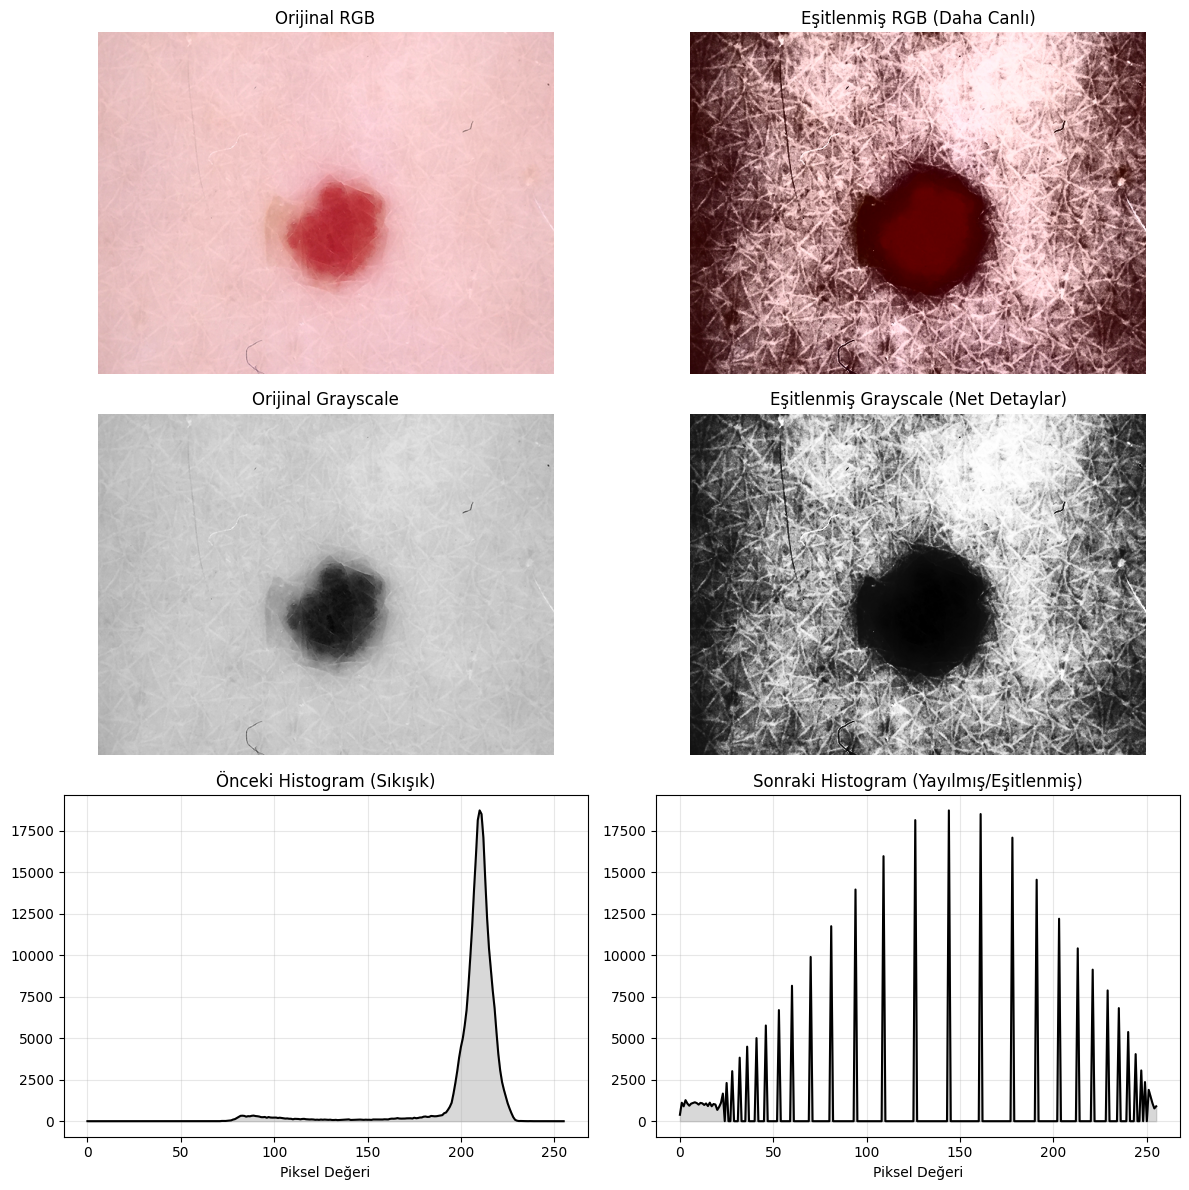


Yorum:
Grafiklerde görüldüğü gibi, orijinal histogram dar bir alana sıkışmıştı (bu yüzden resim soluktu). Eşitleme işleminden sonra histogram 0-255 aralığına yayıldı. Bu sayede resimdeki kontrast arttı ve detaylar belirginleşti


In [ ]:
# 3.2: Histogram Eşitleme

print("3.2 Histogram Eşitleme İşlemi ve Analizi")

# Örnek resmi alıyorum
ornek_resim = secilen_resimler[0]
img_bgr = cv2.imread(ornek_resim)

# 1. Orijinal Halleri Hazırlama
orj_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
orj_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


# 2. Eşitleme İşlemleri
# A) Grayscale Eşitleme (Doğrudan)
eq_gray = cv2.equalizeHist(orj_gray)

# B) RGB Eşitleme (YCrCb Yöntemi - Y Kanalı)
yuv_resim = cv2.cvtColor(orj_rgb, cv2.COLOR_RGB2YCrCb)
y, cr, cb = cv2.split(yuv_resim)
y_esitlenmis = cv2.equalizeHist(y) # Sadece parlaklığı eşitle
yuv_birlestirilmis = cv2.merge((y_esitlenmis, cr, cb))
eq_rgb = cv2.cvtColor(yuv_birlestirilmis, cv2.COLOR_YCrCb2RGB)


# 3. Histogramları Hesaplama
hist_once = cv2.calcHist([orj_gray], [0], None, [256], [0, 256])
hist_sonra = cv2.calcHist([eq_gray], [0], None, [256], [0, 256])

# 4. Görselleştirme (Resimler + Grafikler)
plt.figure(figsize=(12, 12))

# 1: RGB Karşılaştırması
plt.subplot(3, 2, 1)
plt.imshow(orj_rgb)
plt.title("Orijinal RGB")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(eq_rgb)
plt.title("Eşitlenmiş RGB (Daha Canlı)")
plt.axis('off')

# 2: Grayscale Karşılaştırması
plt.subplot(3, 2, 3)
plt.imshow(orj_gray, cmap='gray')
plt.title("Orijinal Grayscale")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(eq_gray, cmap='gray')
plt.title("Eşitlenmiş Grayscale (Net Detaylar)")
plt.axis('off')

# Bölüm 3: Histogram Değişimi (Grafikler)
plt.subplot(3, 2, 5)
plt.plot(hist_once, color='black')
plt.title("Önceki Histogram (Sıkışık)")
plt.xlabel("Piksel Değeri")
plt.grid(True, alpha=0.3)
plt.fill_between(range(256), hist_once.flatten(), color='gray', alpha=0.3)

plt.subplot(3, 2, 6)
plt.plot(hist_sonra, color='black')
plt.title("Sonraki Histogram (Yayılmış/Eşitlenmiş)")
plt.xlabel("Piksel Değeri")
plt.grid(True, alpha=0.3)
plt.fill_between(range(256), hist_sonra.flatten(), color='gray', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nYorum:")
print("Grafiklerde görüldüğü gibi, orijinal histogram dar bir alana sıkışmıştı (bu yüzden resim soluktu). Eşitleme işleminden sonra histogram 0-255 aralığına yayıldı. Bu sayede resimdeki kontrast arttı ve detaylar belirginleşti")

3.3 Gamma Düzeltme (Parlaklık Ayarı) işlemi


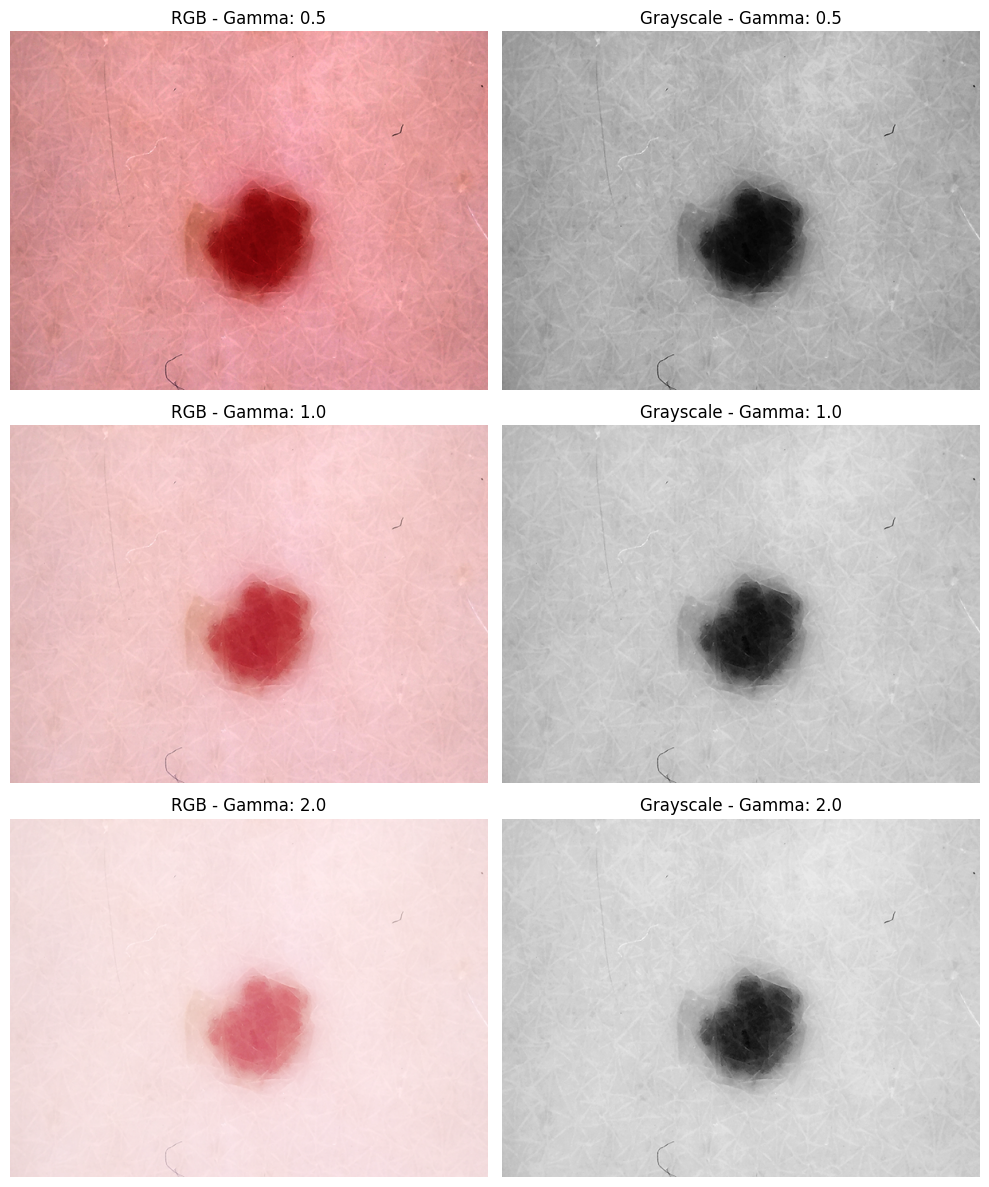


3.3 Yorum ve Analizim:
--------------------------------------------------
1. Gamma 0.5 (Düşük Değer): Görüntüdeki karanlık bölgeler açıldı ve resim genel olarak aydınlandı. Detayları görmek için yararlı ancak renkler biraz soluklaşabiliyor.
2. Gamma 1.0 (Normal): Görüntüde hiçbir değişiklik olmadı, orijinal haliyle aynı.
3. Gamma 2.0 (Yüksek Değer): Görüntü karardı. Bu işlem kontrastı artırsa da karanlık bölgelerdeki detayların kaybolmasına neden oldu.


In [ ]:
# 3.3: Gamma Düzeltme

print("3.3 Gamma Düzeltme (Parlaklık Ayarı) işlemi")

# Örnek resmi alıyorum, ilk resmi kullanıyorum
ornek_resim = secilen_resimler[0]
img_bgr = cv2.imread(ornek_resim)

# 1. Orijinal Formatlar
orijinal_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
orijinal_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Gamma Uygulama Fonksiyonu
def gamma_uygula(img, gamma=1.0):
    # Formül: Piksel = (Piksel / 255) ^ (1/gamma) * 255
    ters_gamma = 1.0 / gamma
    tablo = np.array([((i / 255.0) ** ters_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    # Oluşturduğum tabloyu resme uyguluyorum
    return cv2.LUT(img, tablo)

gamma_degerleri = [0.5, 1.0, 2.0]

# Görselleştirme (3 Satır: Her Gamma değeri için bir satır)
plt.figure(figsize=(10, 12))

for i, g in enumerate(gamma_degerleri):
    # Hem RGB hem Gray için fonksiyonu çağırıyorum
    sonuc_rgb = gamma_uygula(orijinal_rgb, gamma=g)
    sonuc_gray = gamma_uygula(orijinal_gray, gamma=g)

    # Sol Sütun: RGB
    plt.subplot(3, 2, i*2 + 1)
    plt.imshow(sonuc_rgb)
    plt.title(f"RGB - Gamma: {g}")
    plt.axis('off')

    # Sağ Sütun: Grayscale
    plt.subplot(3, 2, i*2 + 2)
    plt.imshow(sonuc_gray, cmap='gray')
    plt.title(f"Grayscale - Gamma: {g}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Yorumlama (Analiz)
print("\n3.3 Yorum ve Analizim:")
print("-" * 50)
print("1. Gamma 0.5 (Düşük Değer): Görüntüdeki karanlık bölgeler açıldı ve resim genel olarak aydınlandı. Detayları görmek için yararlı ancak renkler biraz soluklaşabiliyor.")
print("2. Gamma 1.0 (Normal): Görüntüde hiçbir değişiklik olmadı, orijinal haliyle aynı.")
print("3. Gamma 2.0 (Yüksek Değer): Görüntü karardı. Bu işlem kontrastı artırsa da karanlık bölgelerdeki detayların kaybolmasına neden oldu.")

4: Gürültü Azaltma filtrelerini uyguluyorum


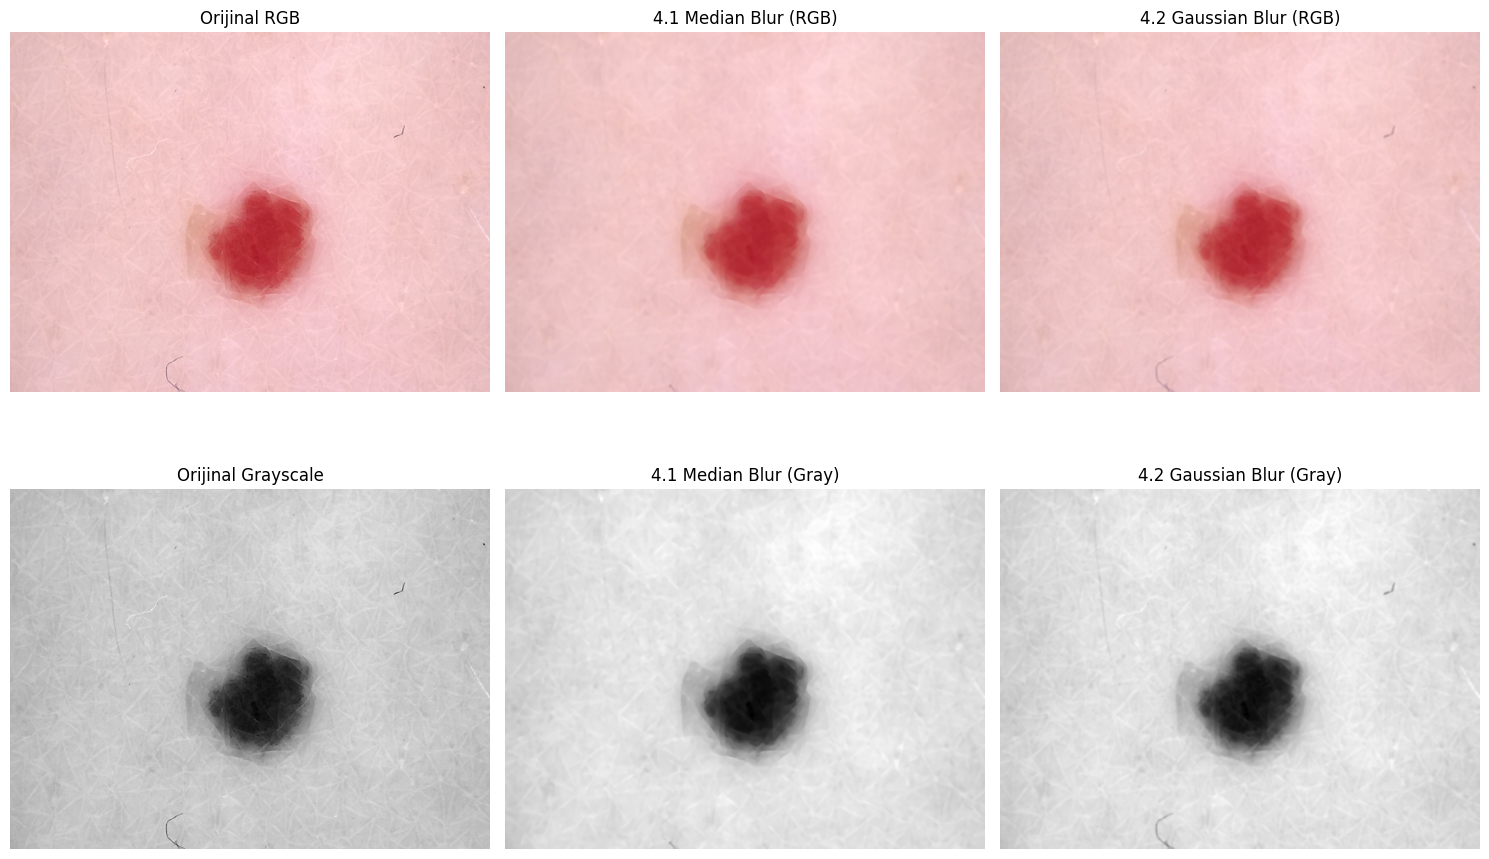


4. Bölüm Karşılaştırma ve Analizim:
--------------------------------------------------
Soru 1: Median blur kenarları daha iyi korur mu?
Cevap: Evet. Çıktılara baktığımda Median Blur'un nesne kenarlarını (sınırlarını) keskin bıraktığını görüyorum. Çünkü pikselin ortalamasını almak yerine ortadaki değeri (medyanı) seçiyor, bu da keskin geçişleri bozmuyor.

Soru 2: Gaussian blur detay kaybına neden oluyor mu?
Cevap: Evet. Gaussian Blur tüm piksellerin ağırlıklı ortalamasını aldığı için görüntüyü genel olarak yumuşatıyor. Bu yüzden ince detaylar ve keskin hatlar biraz kayboluyor (bulanıklaşıyor).


In [ ]:
# 4: GÜRÜLTÜ AZALTMA (MEDIAN vs GAUSSIAN)

print("4: Gürültü Azaltma filtrelerini uyguluyorum")

# İşlem için örnek resmi hazırlıyorum
ornek_resim = secilen_resimler[0]
img_bgr = cv2.imread(ornek_resim)

orijinal_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
orijinal_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# 4.1 Median Blur Uygulama
# Kernel boyutu tek sayı olmalı (örn: 5, 7, 9). Ben 5 seçtim.
k_boyutu = 5
median_rgb = cv2.medianBlur(orijinal_rgb, k_boyutu)
median_gray = cv2.medianBlur(orijinal_gray, k_boyutu)

# 4.2 Gaussian Blur Uygulama
# Yine 5x5'lik bir matris kullanıyorum.
gaussian_rgb = cv2.GaussianBlur(orijinal_rgb, (k_boyutu, k_boyutu), 0)
gaussian_gray = cv2.GaussianBlur(orijinal_gray, (k_boyutu, k_boyutu), 0)


# Görselleştirme ve Karşılaştırma
plt.figure(figsize=(15, 10))

# Satır 1: RGB Karşılaştırması
plt.subplot(2, 3, 1)
plt.imshow(orijinal_rgb)
plt.title("Orijinal RGB")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(median_rgb)
plt.title("4.1 Median Blur (RGB)")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gaussian_rgb)
plt.title("4.2 Gaussian Blur (RGB)")
plt.axis('off')

# Satır 2: Grayscale Karşılaştırması
plt.subplot(2, 3, 4)
plt.imshow(orijinal_gray, cmap='gray')
plt.title("Orijinal Grayscale")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(median_gray, cmap='gray')
plt.title("4.1 Median Blur (Gray)")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(gaussian_gray, cmap='gray')
plt.title("4.2 Gaussian Blur (Gray)")
plt.axis('off')

plt.tight_layout()
plt.show()


# ANALİZ VE YORUMLAR
print("\n4. Bölüm Karşılaştırma ve Analizim:")
print("-" * 50)
print("Soru 1: Median blur kenarları daha iyi korur mu?")
print("Cevap: Evet. Çıktılara baktığımda Median Blur'un nesne kenarlarını (sınırlarını) keskin bıraktığını görüyorum. Çünkü pikselin ortalamasını almak yerine ortadaki değeri (medyanı) seçiyor, bu da keskin geçişleri bozmuyor.")
print("\nSoru 2: Gaussian blur detay kaybına neden oluyor mu?")
print("Cevap: Evet. Gaussian Blur tüm piksellerin ağırlıklı ortalamasını aldığı için görüntüyü genel olarak yumuşatıyor. Bu yüzden ince detaylar ve keskin hatlar biraz kayboluyor (bulanıklaşıyor).")

5: Geometrik Dönüşümler yapılıyor
Uygulanan Rastgele Açı: 2.86 derece


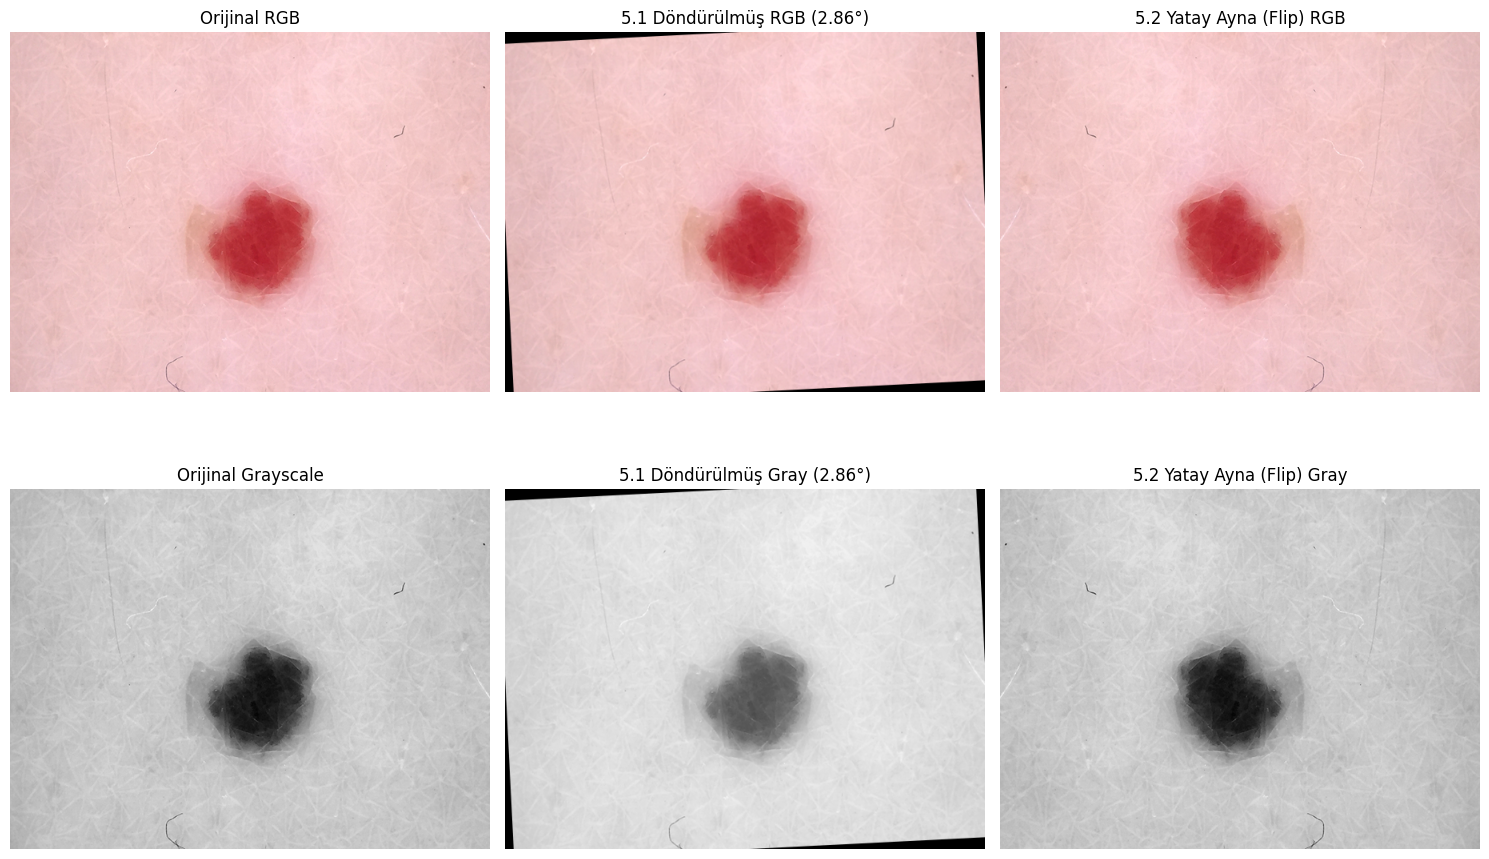


5. Bölüm Analizim:
--------------------------------------------------
1. Döndürme Etkisi:
   Resmi saat yönünün tersine tam olarak 2.86 derece döndürdüm.
   Görüntü çerçeve içinde döndüğü için köşelerde siyah boşluklar oluştu.

2. Simetri ve Ayna Farkı:
   Yatay flip işlemi resmi sağdan sola ters çevirdi.
   Deri lezyonları genellikle asimetrik olduğu için ayna görüntüsü orijinalinden farklı duruyor.
   Bu durum, lezyondaki şekil bozukluklarını fark etmemizi kolaylaştırıyor.


In [ ]:
# 5: DÖNDÜRME VE AYNA ÇEVİRME (FLIPPING)

print("5: Geometrik Dönüşümler yapılıyor")

# İşlem için örnek resmi alıyorum
ornek_resim = secilen_resimler[0]
img_bgr = cv2.imread(ornek_resim)

orijinal_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
orijinal_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

rows, cols = orijinal_gray.shape


# 5.1 Rastgele Döndürme
aci = np.random.uniform(0, 10)
print(f"Uygulanan Rastgele Açı: {aci:.2f} derece")

# Döndürme Matrisi
M = cv2.getRotationMatrix2D((cols/2, rows/2), aci, 1)

donmus_rgb = cv2.warpAffine(orijinal_rgb, M, (cols, rows))
donmus_gray = cv2.warpAffine(orijinal_gray, M, (cols, rows))


# 5.2 Yatay Ayna Çevirme
ayna_rgb = cv2.flip(orijinal_rgb, 1)
ayna_gray = cv2.flip(orijinal_gray, 1)


# Görselleştirme
plt.figure(figsize=(15, 10))

# Satır 1: RGB İşlemleri
plt.subplot(2, 3, 1)
plt.imshow(orijinal_rgb)
plt.title("Orijinal RGB")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(donmus_rgb)
plt.title(f"5.1 Döndürülmüş RGB ({aci:.2f}°)")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(ayna_rgb)
plt.title("5.2 Yatay Ayna (Flip) RGB")
plt.axis('off')

# Satır 2: Grayscale İşlemleri
plt.subplot(2, 3, 4)
plt.imshow(orijinal_gray, cmap='gray')
plt.title("Orijinal Grayscale")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(donmus_gray, cmap='gray')
plt.title(f"5.1 Döndürülmüş Gray ({aci:.2f}°)")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(ayna_gray, cmap='gray')
plt.title("5.2 Yatay Ayna (Flip) Gray")
plt.axis('off')

plt.tight_layout()
plt.show()


# ANALİZ
print("\n5. Bölüm Analizim:")
print("-" * 50)
print("1. Döndürme Etkisi:")
print(f"   Resmi saat yönünün tersine tam olarak {aci:.2f} derece döndürdüm.")
print("   Görüntü çerçeve içinde döndüğü için köşelerde siyah boşluklar oluştu.")
print("")
print("2. Simetri ve Ayna Farkı:")
print("   Yatay flip işlemi resmi sağdan sola ters çevirdi.")
print("   Deri lezyonları genellikle asimetrik olduğu için ayna görüntüsü orijinalinden farklı duruyor.")
print("   Bu durum, lezyondaki şekil bozukluklarını fark etmemizi kolaylaştırıyor.")

6. Bölüm: Fourier Dönüşümü ve Frekans Filtreleme


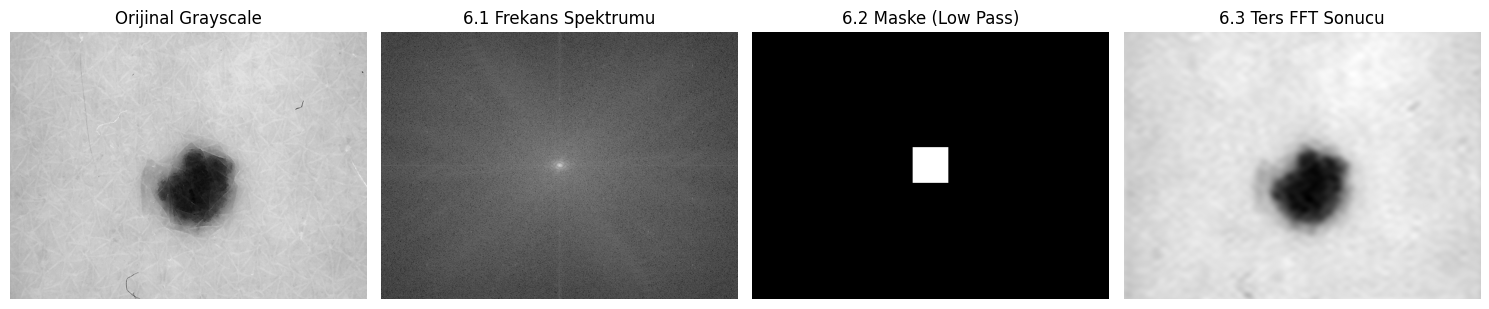


6.4 Karşılaştırma ve Yorumum:
--------------------------------------------------
1. Spektrum Analizi: Frekans spektrumunda merkezdeki parlak nokta resmin genel yapısını, etrafındaki dağınık noktalar ise detayları (kenarlar, gürültü) temsil eder.
2. Maske Etkisi: Merkezdeki beyaz alan sayesinde sadece 'Alçak Frekansları' (genel şekli) geçirdik. Kenarlardaki siyah alanlar ise 'Yüksek Frekansları' (keskin detayları) sildi.
3. Sonuç: Ters FFT sonucunda elde ettiğimiz görüntü, orijinaline göre çok daha bulanık. Çünkü görüntüyü keskinleştiren detay frekanslarını maskeleyerek yok ettik.


In [ ]:
# 6: FREKANS ALANINDA FİLTRELEME (FFT)

print("6. Bölüm: Fourier Dönüşümü ve Frekans Filtreleme")

# İşlem için örnek resmi alıyorum
ornek_resim = secilen_resimler[0]
img_bgr = cv2.imread(ornek_resim)

# 6.1 Fourier Dönüşümü
orijinal_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# FFT İşlemi
f = np.fft.fft2(orijinal_gray)
fshift = np.fft.fftshift(f) # Sıfır frekans bileşenini merkeze taşıma

# Spektrumu görselleştirmek için Logaritmik Dönüşüm yapıyorum
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# 6.2 Alçak Geçiren Filtre (Low Pass Filter) Oluşturma
rows, cols = orijinal_gray.shape
crow, ccol = rows//2, cols//2 # Resmin merkez noktası

# Önce simsiyah bir maske oluşturuyorum (Tüm frekansları engelle)
maske = np.zeros((rows, cols), np.uint8)

# Merkeze 60x60'lık beyaz bir kare açıyorum (Sadece düşük frekanslar geçsin)
r = 30 # Yarıçap
maske[crow-r:crow+r, ccol-r:ccol+r] = 1

# 6.3 Ters Fourier (Inverse FFT)
# Maskeyi frekans uzayına uyguluyorum
fshift_masked = fshift * maske

# İşlemi geri alıyorum
f_ishift = np.fft.ifftshift(fshift_masked)
img_back = np.fft.ifft2(f_ishift) # Karmaşık sayı döner
img_back = np.abs(img_back) # Mutlak değerini alıp görüntüye çeviriyorum


# Görselleştirme
plt.figure(figsize=(15, 6))

# 1. Orijinal Gri Resim
plt.subplot(1, 4, 1)
plt.imshow(orijinal_gray, cmap='gray')
plt.title("Orijinal Grayscale")
plt.axis('off')

# 2. Frekans Spektrumu
plt.subplot(1, 4, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("6.1 Frekans Spektrumu")
plt.axis('off')

# 3. Uygulanan Maske
plt.subplot(1, 4, 3)
plt.imshow(maske, cmap='gray')
plt.title("6.2 Maske (Low Pass)")
plt.axis('off')

# 4. Sonuç Görüntü
plt.subplot(1, 4, 4)
plt.imshow(img_back, cmap='gray')
plt.title("6.3 Ters FFT Sonucu")
plt.axis('off')

plt.tight_layout()
plt.show()


# ANALİZ
print("\n6.4 Karşılaştırma ve Yorumum:")
print("-" * 50)
print("1. Spektrum Analizi: Frekans spektrumunda merkezdeki parlak nokta resmin genel yapısını, etrafındaki dağınık noktalar ise detayları (kenarlar, gürültü) temsil eder.")
print("2. Maske Etkisi: Merkezdeki beyaz alan sayesinde sadece 'Alçak Frekansları' (genel şekli) geçirdik. Kenarlardaki siyah alanlar ise 'Yüksek Frekansları' (keskin detayları) sildi.")
print("3. Sonuç: Ters FFT sonucunda elde ettiğimiz görüntü, orijinaline göre çok daha bulanık. Çünkü görüntüyü keskinleştiren detay frekanslarını maskeleyerek yok ettik.")

7. Bölüm: Keskinleştirme ve Büyütme işlemleri


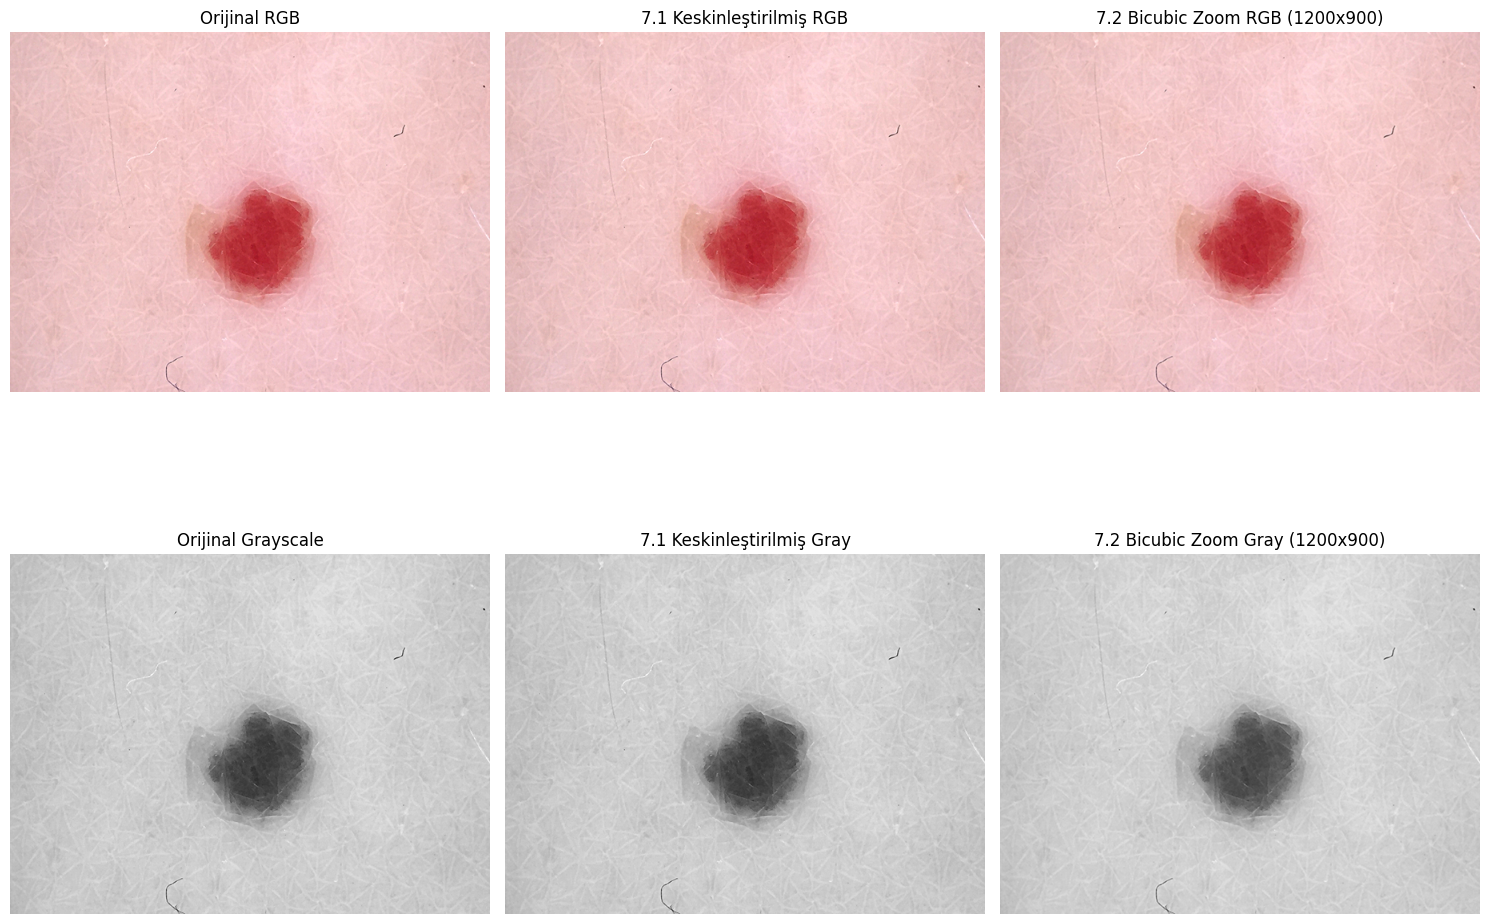


7. Bölüm Analiz ve Yorumlarım:
--------------------------------------------------
1. Keskinleştirme Etkisi:
   Unsharp Masking uyguladığımda, lezyonun sınırları ve deri üzerindeki ince detaylar daha belirgin hale geldi.
   Ancak bu işlem kontrastı artırdığı için resimdeki gürültüleri (noise) de biraz belirginleştirdi.

2. Bicubic Enterpolasyon Kalitesi:
   Görüntüyü 600x450 boyutundan 1200x900 boyutuna (2 katına) çıkardım.
   Bicubic yöntem kullandığım için, pikseller kare kare (pixelated) görünmek yerine daha yumuşak geçişlerle büyütüldü.
   Sonuç olarak görüntü büyüdü ancak kenarlarda hafif bir yumuşama oluştu.


In [ ]:
# 7: KESKİNLEŞTİRME VE ENTERPOLASYON

print("7. Bölüm: Keskinleştirme ve Büyütme işlemleri")

# İşlem için örnek resmi alıyorum
ornek_resim = secilen_resimler[0]
img_bgr = cv2.imread(ornek_resim)

orijinal_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
orijinal_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# 7.1 Unsharp Masking ile Keskinleştirme
# Mantık: Orijinal resimden bulanık halini çıkarırsak geriye "kenarlar" kalır.
# Bu kenarları orijinal resme eklersek resim keskinleşir.

def unsharp_mask(img):
    # 1. Resmi hafifçe bulanıklaştır (Gaussian Blur)
    gaussian = cv2.GaussianBlur(img, (9, 9), 10.0)
    # 2. Orijinal ile harmanla (Formül: Orijinal * 1.5 + Bulanık * -0.5)
    # Bu işlem kenarları belirginleştirir.
    return cv2.addWeighted(img, 1.5, gaussian, -0.5, 0, img)

# Hem RGB hem Gray için uyguluyorum
keskin_rgb = unsharp_mask(orijinal_rgb)
keskin_gray = unsharp_mask(orijinal_gray)

# 7.2 Bicubic Enterpolasyon (2 Kat Büyütme)
# Keskinleştirdiğim görüntüleri 2 katına çıkarıyorum.

def bicubic_zoom(img):
    height, width = img.shape[:2]
    # Yeni boyutları hesaplıyorum (x2)
    yeni_boyut = (width * 2, height * 2)
    # cv2.INTER_CUBIC parametresi Bicubic yöntemi
    return cv2.resize(img, yeni_boyut, interpolation=cv2.INTER_CUBIC)

zoom_rgb = bicubic_zoom(keskin_rgb)
zoom_gray = bicubic_zoom(keskin_gray)


# Görselleştirme
plt.figure(figsize=(15, 12))

# Satır 1: RGB İşlemleri
plt.subplot(2, 3, 1)
plt.imshow(orijinal_rgb)
plt.title("Orijinal RGB")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(keskin_rgb)
plt.title("7.1 Keskinleştirilmiş RGB")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(zoom_rgb)
plt.title(f"7.2 Bicubic Zoom RGB ({zoom_rgb.shape[1]}x{zoom_rgb.shape[0]})")
plt.axis('off')

# Satır 2: Grayscale İşlemleri
plt.subplot(2, 3, 4)
plt.imshow(orijinal_gray, cmap='gray')
plt.title("Orijinal Grayscale")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(keskin_gray, cmap='gray')
plt.title("7.1 Keskinleştirilmiş Gray")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(zoom_gray, cmap='gray')
plt.title(f"7.2 Bicubic Zoom Gray ({zoom_gray.shape[1]}x{zoom_gray.shape[0]})")
plt.axis('off')

plt.tight_layout()
plt.show()


# ANALİZ
print("\n7. Bölüm Analiz ve Yorumlarım:")
print("-" * 50)
print("1. Keskinleştirme Etkisi:")
print("   Unsharp Masking uyguladığımda, lezyonun sınırları ve deri üzerindeki ince detaylar daha belirgin hale geldi.")
print("   Ancak bu işlem kontrastı artırdığı için resimdeki gürültüleri (noise) de biraz belirginleştirdi.")
print("")
print("2. Bicubic Enterpolasyon Kalitesi:")
print(f"   Görüntüyü {orijinal_rgb.shape[1]}x{orijinal_rgb.shape[0]} boyutundan {zoom_rgb.shape[1]}x{zoom_rgb.shape[0]} boyutuna (2 katına) çıkardım.")
print("   Bicubic yöntem kullandığım için, pikseller kare kare (pixelated) görünmek yerine daha yumuşak geçişlerle büyütüldü.")
print("   Sonuç olarak görüntü büyüdü ancak kenarlarda hafif bir yumuşama oluştu.")